In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap
import seaborn as sns


In [2]:
uk = pd.read_csv('uk_road_accident.csv')
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
uk.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
uk['Index']

0         200701BS64157
1         200701BS65737
2         200701BS66127
3         200701BS66128
4         200701BS66837
              ...      
660674    201091NM01760
660675    201091NM01881
660676    201091NM01935
660677    201091NM01964
660678    201091NM02142
Name: Index, Length: 660679, dtype: object

In [6]:
uk['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

In [7]:
uk['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [8]:
uk['Latitude']

0         51.506187
1         51.495029
2         51.517715
3         51.495478
4         51.488576
            ...    
660674    57.374005
660675    57.232273
660676    57.585044
660677    57.214898
660678    57.575210
Name: Latitude, Length: 660679, dtype: float64

In [9]:
uk['Light_Conditions']

0               Darkness - lights lit
1                            Daylight
2         Darkness - lighting unknown
3                            Daylight
4               Darkness - lights lit
                     ...             
660674                       Daylight
660675         Darkness - no lighting
660676                       Daylight
660677         Darkness - no lighting
660678                       Daylight
Name: Light_Conditions, Length: 660679, dtype: object

In [10]:
uk['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [11]:
uk['Longitude']

0        -0.209082
1        -0.173647
2        -0.210215
3        -0.202731
4        -0.192487
            ...   
660674   -3.467828
660675   -3.809281
660676   -3.862727
660677   -3.823997
660678   -3.895673
Name: Longitude, Length: 660679, dtype: float64

In [12]:
uk['Number_of_Vehicles']

0         2
1         2
2         3
3         4
4         2
         ..
660674    1
660675    1
660676    3
660677    2
660678    1
Name: Number_of_Vehicles, Length: 660679, dtype: int64

In [13]:
uk['Road_Surface_Conditions']

0                  Dry
1          Wet or damp
2                  Dry
3                  Dry
4                  Dry
              ...     
660674             Dry
660675    Frost or ice
660676    Frost or ice
660677     Wet or damp
660678     Wet or damp
Name: Road_Surface_Conditions, Length: 660679, dtype: object

In [14]:
uk['Road_Type']

0         Single carriageway
1         Single carriageway
2                        NaN
3         Single carriageway
4                        NaN
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: object

In [15]:
uk['Urban_or_Rural_Area']

0         Urban
1         Urban
2         Urban
3         Urban
4         Urban
          ...  
660674    Rural
660675    Rural
660676    Rural
660677    Rural
660678    Rural
Name: Urban_or_Rural_Area, Length: 660679, dtype: object

In [16]:
uk['Weather_Conditions']

0            Fine no high winds
1         Raining no high winds
2                           NaN
3            Fine no high winds
4                           NaN
                  ...          
660674       Fine no high winds
660675       Fine no high winds
660676       Fine no high winds
660677       Fine no high winds
660678    Snowing no high winds
Name: Weather_Conditions, Length: 660679, dtype: object

In [17]:
uk['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: object

In [18]:
uk.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [19]:
uk['Latitude'] = uk['Latitude'].fillna(uk['Latitude'].mean())
uk['Longitude'] = uk['Longitude'].fillna(uk['Longitude'].mean())
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].fillna('unaccounted')
uk['Road_Type'] = uk['Road_Type'].fillna('unaccounted')
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].fillna(uk['Urban_or_Rural_Area'].mode()[0])
uk['Weather_Conditions'] = uk['Weather_Conditions'].fillna('unaccounted')
uk.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1><i>Correcting Data Types</i></h1>

In [20]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [21]:
uk['Index'] = uk['Index'].astype('category')
uk['Accident_Severity'] = uk['Accident_Severity'].astype('category')
uk['Latitude'] = uk['Latitude'].astype('category')
uk['Light_Conditions'] = uk['Light_Conditions'].astype('category')
uk['District Area'] = uk['District Area'].astype('category')
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].astype('category')
uk['Road_Type'] = uk['Road_Type'].astype('category')
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].astype('category')
uk['Weather_Conditions'] = uk['Weather_Conditions'].astype('category')
uk['Vehicle_Type'] = uk['Vehicle_Type'].astype('category')

<h1><i>Clearing Inconsistencies with the Data Set</i></h1>

In [22]:
uk['Accident Date'] = uk['Accident Date'].str.strip()
uk['Accident Date'] = uk['Accident Date'].astype('str')
uk['Accident Date'] = uk['Accident Date'].str.replace('/','-')

In [23]:
uk['Accident Date'] = pd.to_datetime (uk['Accident Date'],dayfirst=True,errors ='coerce')
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1><i>Adjusting Data Types</i></h1>

In [24]:
uk.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1><i>Extracting Date Information Using Pnadas Date Time</i></h1>

In [25]:
uk['Year'] = uk ['Accident Date'].dt.year
uk['Month'] = uk ['Accident Date'].dt.month
uk['Day'] = uk ['Accident Date'].dt.day
uk['DayOfWeek'] = uk ['Accident Date'].dt.dayofweek

In [26]:
uk.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>20 Insights for United Kingdom road accidents</h1>
<hr>

<h3><i>Analyst:</i><b> Kim David Penaredonda</b></h3>

<h1>1.) Does the road type affect the average number of casualties?</h1>

In [27]:
roadType = uk.groupby('Road_Type')['Number_of_Casualties'].mean()
roadType

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.344666
Slip road             1.423661
unaccounted           1.248230
Name: Number_of_Casualties, dtype: float64

<h1>Insight 1</h1>
<hr>
<p> Depending on the result, the slip road has the highest casualties while the one way street has the least casualties. this means that the road type really affects the average of casualties.</p>

<h1>2.) What is the average casualty count in urban, rural, and unclassified areas?</h1>

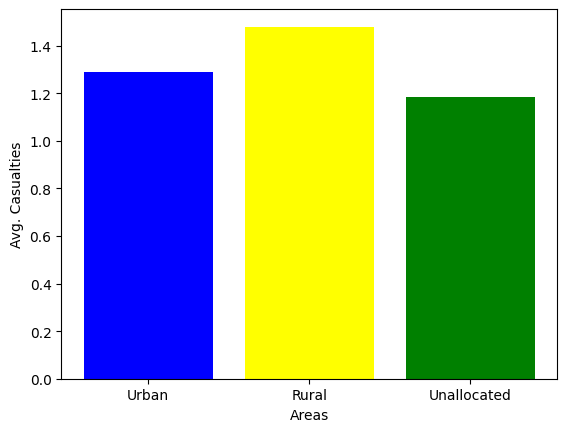

In [28]:

urban = uk[uk['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].mean()
rural = uk[uk['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties'].mean()
not_recorded = uk[uk['Urban_or_Rural_Area'] == 'Unallocated']['Number_of_Casualties'].mean()
plt.bar(['Urban', 'Rural', 'Unallocated'], [urban, rural, not_recorded], color=['blue', 'yellow', 'green'])
plt.xlabel('Areas')
plt.ylabel('Avg. Casualties')
plt.show()

<h1>Insight 2</h1>
<hr>
<p>There is a high casualty count in rural areas compared to urban areas with lower casualties.</p>

<h1>Insight 3</h1>
<hr>
<p>On the other hand the unallocated areas has the least count of casualties.</p>

<h1>3.Does the light condition affect the number of casualties?</h1>

In [29]:
uk[uk['Light_Conditions'] == 'Daylight']['Number_of_Casualties'].sum()

np.int64(649889)

In [30]:
uk[uk['Light_Conditions'] != 'Daylight']['Number_of_Casualties'].sum()

np.int64(246679)

<h1>Insight 4</h1>
<hr>
<p>As we can see the number of casualties are much higher in broad daylight than night.</p>

<h1>Insight 5</h1>
<hr>
<p>This result shows us that the light conditionS does not really affect the number of casualties.</p>


<h1> 4.) How many serious Casualties are recorded at Daylight?</h1>

In [31]:
uk[(uk['Accident_Severity'] == 'Serious') & (uk['Light_Conditions'] == 'Daylight')]['Number_of_Casualties'].sum()

np.int64(87023)

In [32]:
uk[(uk['Accident_Severity'] == 'Serious') & (uk['Light_Conditions'] != 'Daylight')]['Number_of_Casualties'].sum()


np.int64(42416)

<h1>Insight 6</h1>
<hr>
<p>The number of Serious Accidents that have been recorded during daylight were 87023.</p>

<h1>Insight 7</h1>
<hr>
<p>On the other hand the number of Serious Accidents recorded during night were 42416 </p>

<h1>Insight 8</h1>
<hr>
<p>This means that the number of Serious Accident is higher during daytime.</p>

<h1>5.) Are multi-vehicle accidents most likely occcur during wet weather than dry weather? </h1>

In [33]:
multiVehicleAcc = uk.groupby(uk['Number_of_Vehicles'] >= 2)['Road_Surface_Conditions'].value_counts().unstack()
multiVehicleAcc[['Dry', 'Wet or damp']]

Road_Surface_Conditions,Dry,Wet or damp
Number_of_Vehicles,,
False,129494,59265
True,318327,127443


<h1> Insight 9</h1>
<hr>
<p>As we can see there are 318327 number of vehicles that are involved in accidents in dry road conditions. while on the other hand there are 127443
number of invlolved vehicles in dry or damp conditon of the road accidents. </p>

<h1> Insight 10</h1>
<hr>
<p>This means that vehicular accidents most likely occur during dry condition of the road.</p>

<h1>6.) In which area has the highst number of accident?</h1>

In [34]:
uk['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1>Insight 11</h1>
<hr>
<p> Based on the result there are higher number of accident in Urban areas than Rural Areas. </p>

<h1>Insight 12</h1>
<hr>
<p>The recorded number of accidents in Urban areas are 421663 while in Rural areas there are 238990 number of recorded number of accidents, on the other hand there are only 11 recorded accidents in unallocated areas. </p>

<h1>7.) Among all accidents what vehicles type has the most frequent involvement in accidents?</h1>

In [35]:
uk['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>Insight 13</h1>
<hr>
<h4>Cars has the highest number of involvement in vehicle accidents among all accidents, they have recorded 497992 number of car involve accidents.</h4>

<h1>Insight 14</h1>
<hr>
<h4>Vans rank second among all the recorded accidents, on the other hand Ridden horses has the least recorded number of accidents.</h4>

<h1>8.) How does weather condition affects the average number of casualties?</h1>

In [36]:
uk.groupby('Weather_Conditions')['Number_of_Casualties'].mean()

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.350480
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
unaccounted              1.233720
Name: Number_of_Casualties, dtype: float64

<h1>Insight 15</h1>
<hr>

<p>Fog & Mist has the highest average number of casualties, recording 1.45 number of casulaties per accident.</p>

<h1>Insight 16</h1>
<hr>
<p>Fog & Mist really affect the vehicle accidents because it could reduce the visibility of the driver.</p>

<h1>Insight 17</h1>
<hr>
<p>Snowing and no high winds has the lowest number of casualties. It only recorded 1.34 casualties per accident.</p>

<h1>9.)Which district area has the highest number of accidents overall? </h1>

uk['District Area'].value_counts()

<h1>Insight 18</h1>
<hr>
<p>Birmingham has the highest number of accidents with 13491 recorded number of vehicular accidents.</p>

<h1>Insight 19</h1>
<hr>
<p>Based on the record Leeds ranked 2nd of having the highest number of accident, recording 8898 number of accident.</p>

<h1>10.) What proportion of accidents result in only one casualty?</h1>

In [37]:
(uk['Number_of_Casualties'] == 1).mean()

np.float64(0.7629136085754201)

<h1>Insight 20</h1>
<hr>

<p>Approximately 76%-77% of accidents result in exactly one casualty, indicating that most road accidents involve single-occupant vehicles or minor collisions where only one person is injured, rather than mass casualty events.</p>

<h1>11.) How does casualty count vary between different road surface conditions?</h1>

In [38]:
uk.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()

Road_Surface_Conditions
Dry                     597723
Flood over 3cm. deep      1521
Frost or ice             24976
Snow                      8008
Wet or damp             263457
unaccounted                883
Name: Number_of_Casualties, dtype: int64

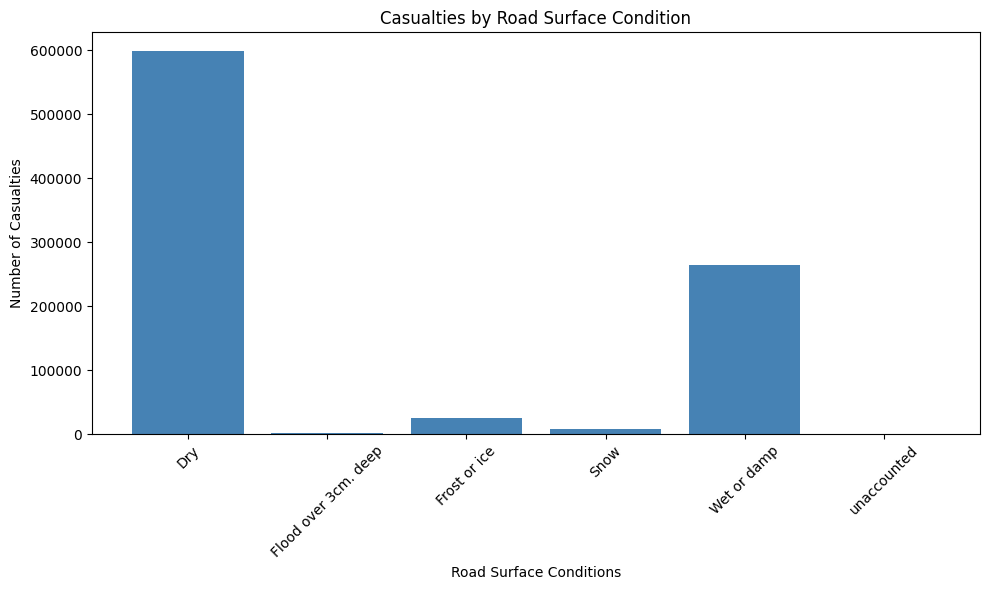

In [49]:
conditions = ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp', 'unaccounted']
casualties = [597723, 1521, 24976, 8008, 263457, 883]

plt.figure(figsize=(10, 6))  # Optional: makes the chart larger
plt.bar(conditions, casualties, color='steelblue')

plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Road Surface Condition')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h1>Insight 21</h1>
<hr>
<p>as we can see the dry condition of road surface has the highest casulaty count while we or dampt condition has the second highest casulaty count. </p>

<h1>insight 22</h1>
<hr> 
<p>on the other hand the roads with flood over 3cm deep is the second to the last casualty count.</p>

<h1>12.) Are fatal accidents more common during summer than winter?

In [52]:
Winter = uk["Winter"] = uk["Month"].isin([12, 1, 2])
Summer = uk['Summer'] = uk["Month"].between(6, 8)

In [53]:
uk[uk['Accident_Severity'] == 'Fatal'].groupby(Winter).size()

Month
False    6633
True     2028
dtype: int64

In [54]:
uk[uk['Accident_Severity'] == 'Fatal'].groupby(Summer).size()

Month
False    6434
True     2227
dtype: int64

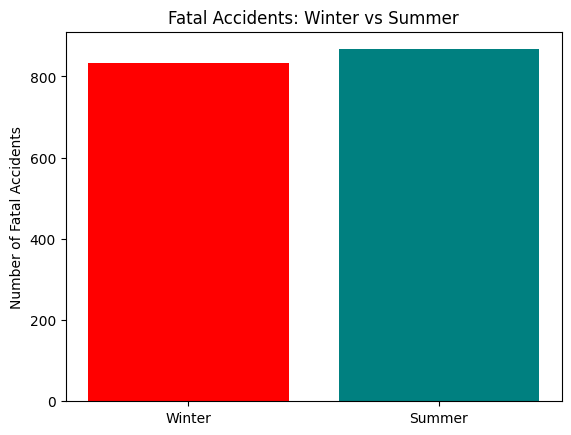

In [56]:
seasons = ['Winter', 'Summer']
fatal_counts = [834, 867]

plt.bar(seasons, fatal_counts, color=['red', 'teal'])
plt.title("Fatal Accidents: Winter vs Summer")
plt.ylabel("Number of Fatal Accidents")
plt.show()

<h1>Insight 23</h1>
<hr>
<p>based on the result summer season is slightly higher than winter in terms of fatal accidents. </p>

<h1>13. How do weather conditions influence road surface states during accidents?</h1>

In [57]:
uk[uk['Accident_Severity'] == 'Fatal'].groupby(['Weather_Conditions', 'Road_Surface_Conditions']).size().sort_values(ascending=False).unstack(0)

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Road_Surface_Conditions,,,,,,,,,
Dry,103,5580,18,12,0,2,0,2,71
Flood over 3cm. deep,1,4,0,0,5,11,0,0,2
Frost or ice,3,121,8,43,1,5,0,8,4
Snow,0,14,0,1,0,1,2,17,0
Wet or damp,68,1380,56,109,139,829,1,9,29
unaccounted,0,1,0,0,0,0,0,0,1


<h1>insight 24</h1>
<hr>
<p>A total of 968 accidents occurred on wet or damp roads during rainfall—both with and without high winds. This reinforces the idea that rain reliably creates slippery conditions, raising the risk of collisions. What’s surprising, though, is that I always assumed rain alone posed the greatest danger to tire grip and vehicle control.</p>


<h1>insight 25</h1>
<hr>
<p>There were 56 recorded accidents on wet or damp roads during foggy or misty weather. While such conditions are often portrayed as highly dangerous in movies, the data suggests otherwise. It’s possible that drivers become more cautious in these situations, fully aware of the risks associated with speeding or reckless behavior. Knowing the potential consequences, they may choose to drive more carefully."</p>

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Shropshire Analysis</h3>
<hr>
<br>
<img src='https://images.pexels.com/photos/258117/pexels-photo-258117.jpeg?cs=srgb&dl=pexels-pixabay-258117.jpg&fm=jpg'>

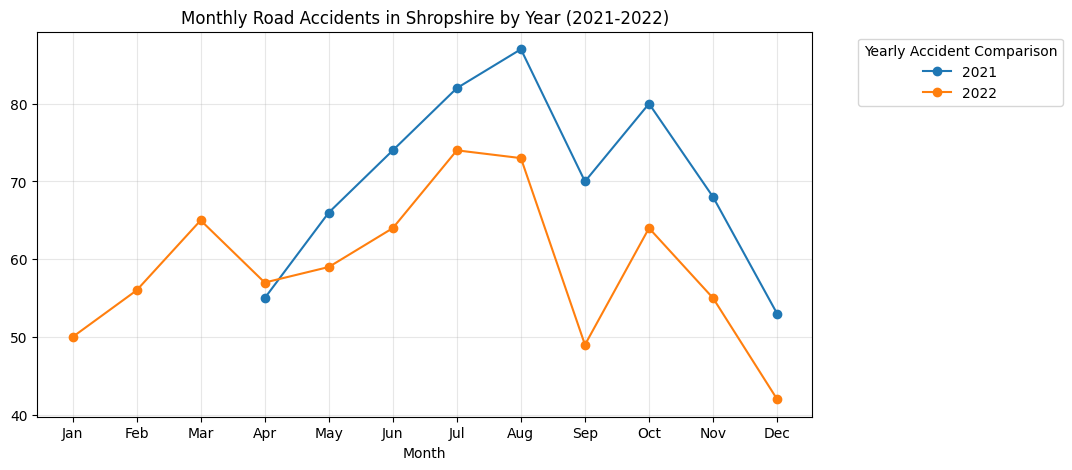

In [59]:
shropshire_df = uk[uk['District Area'] == 'Shropshire']


monthly_shropshire_df = shropshire_df.groupby(['Year', 'Month']).size()

monthly_shropshire_df = monthly_shropshire_df.unstack(level=0)

monthly_shropshire_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2021-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

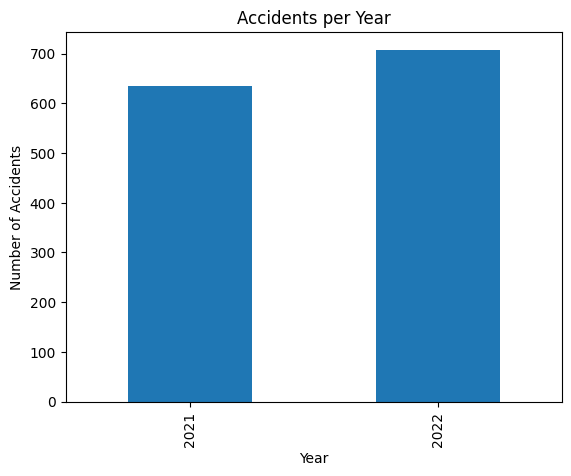

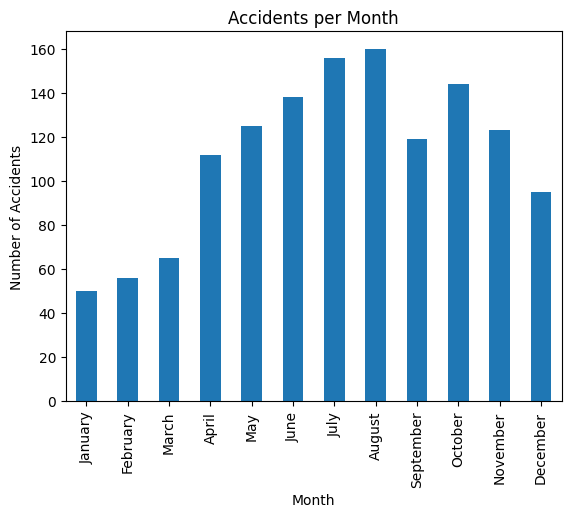

DayOfWeek
Monday       193
Tuesday      199
Wednesday    183
Thursday     185
Friday       174
Saturday     225
Sunday       184
Name: count, dtype: int64


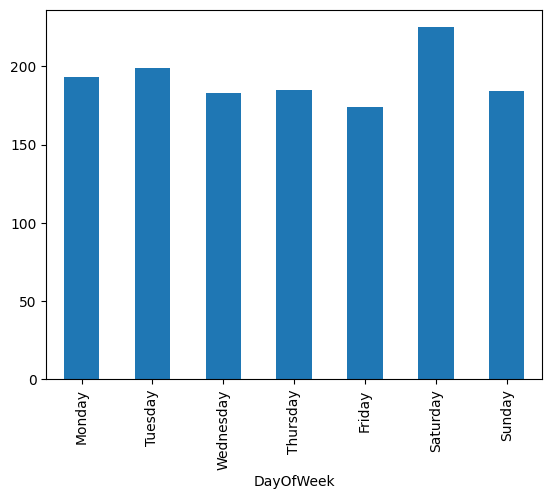

In [60]:
accidents_per_year = shropshire_df['Year'].value_counts().sort_index()
accidents_per_month = shropshire_df['Month'].value_counts().sort_index()
accidents_per_day = shropshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Shropshire</h1>

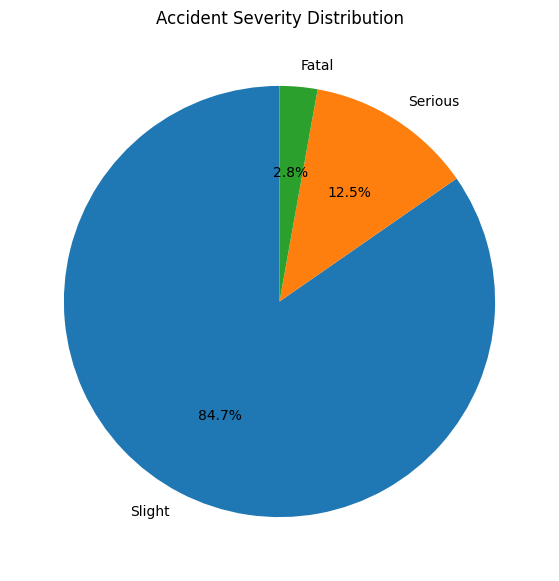

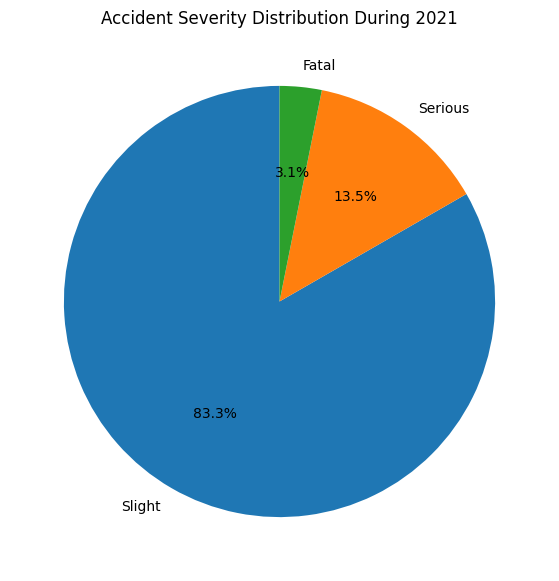

In [61]:
severity_shropshire  = shropshire_df['Accident_Severity'].value_counts()

plt.pie(severity_shropshire,
        labels = severity_shropshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_shropshire = shropshire_df[shropshire_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_shropshire['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2021')
plt.show()

<h1> Insight 26 </h1>
<hr>
<p>In the District of Shropshire, data from monthly road accidents in 2021 and 2022 reveals that August consistently had the highest number of incidents in both years. A noticeable trend follows: a decline in September, a rise in October, and a steady decrease through December. According to articles I found online, August coincides with the UK’s summer holiday season, which likely contributes to increased traffic and the presence of tourists unfamiliar with local roads.
In 2022, the overall accident count was higher than in 2021, with August again topping the chart and January recording the fewest incidents—surprisingly low considering it follows the festive season.
Saturdays emerged as the most accident-prone day, possibly due to heavier weekend traffic as more people take to the roads.
Most accidents were classified as slight in severity, accounting for 84.7% in 2022 and 83.3% in 2021
</p>

<h3>Isle of Wight Analysis</h3>
<hr>
<br>
<img src='https://camo.githubusercontent.com/ffec4c7d57d9b26c749d5c54d6c4bc8c4de637178d35685a96f3028e1d6a7189/68747470733a2f2f69636865662e626263692e636f2e756b2f6e6577732f3937362f63707370726f6470622f31333544312f70726f64756374696f6e2f5f3132303533313339375f696f776765747479696d616765732d313237323537393134342e6a7067'>

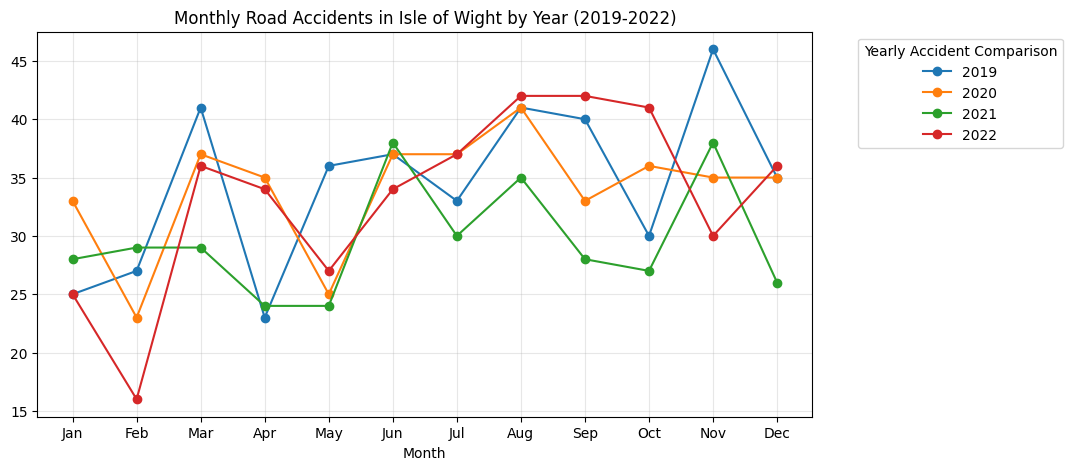

In [74]:
islewight_df = uk[uk['District Area'] == 'Isle of Wight']
monthly_islewight_df = islewight_df.groupby(['Year', 'Month']).size()

monthly_islewight_df = monthly_islewight_df.unstack(level=0)

monthly_islewight_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Isle of Wight by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

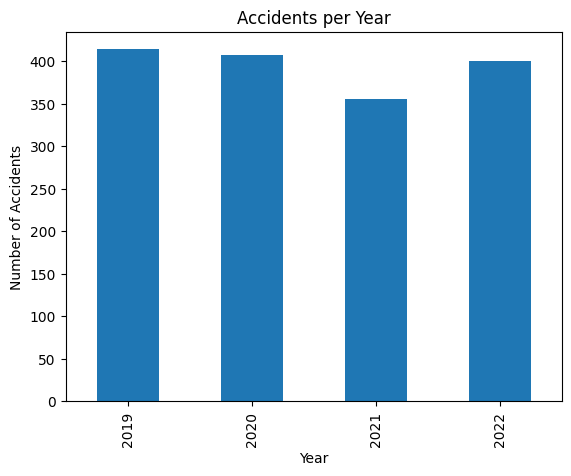

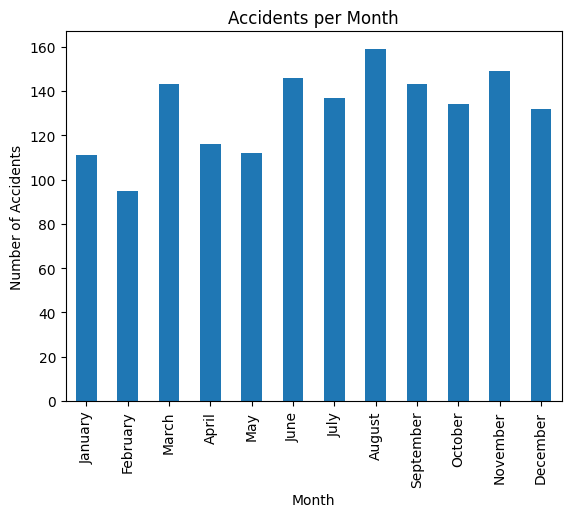

DayOfWeek
Monday       178
Tuesday      239
Wednesday    225
Thursday     254
Friday       237
Saturday     271
Sunday       173
Name: count, dtype: int64


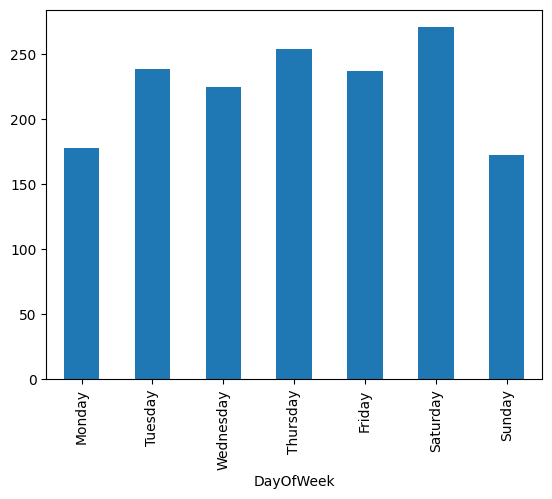

In [75]:
accidents_per_year = islewight_df['Year'].value_counts().sort_index()
accidents_per_month = islewight_df['Month'].value_counts().sort_index()
accidents_per_day = islewight_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

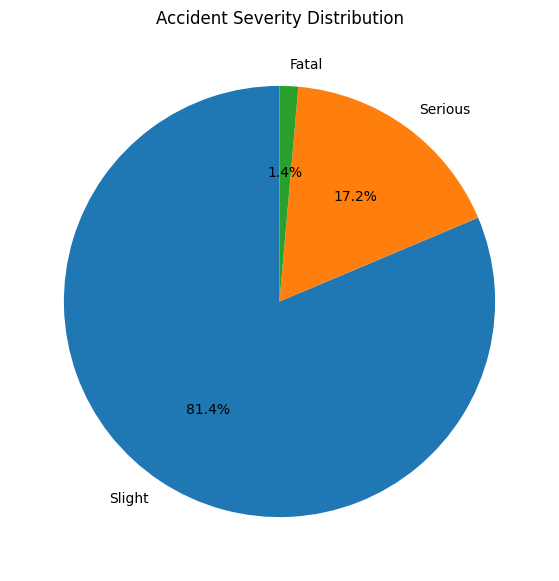

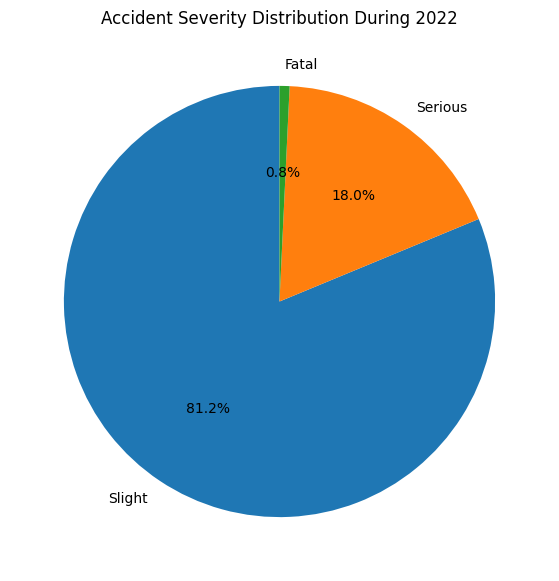

In [76]:
severity_islewight  = islewight_df['Accident_Severity'].value_counts()

plt.pie(severity_islewight,
        labels = severity_islewight.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_islewight = islewight_df[islewight_df['Year'] == 2022]
# severity_2021
lsc_2021 = severity_2021_islewight['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2022')
plt.show()


<h1>Insight 27 </h1>
<hr>
<p>In the Isle of Wight District, data from monthly road accidents between 2019 and 2022 shows a consistent drop in incidents every April. This may be due to regular workdays, fewer tourists, and reduced road traffic during that period.
    
The year 2019 recorded the highest number of accidents, possibly influenced by the onset of COVID-19, although the yearly differences are relatively small. August remains the peak month for accidents—similar to Shropshire—while February has the lowest count, which contrasts with Shropshire’s trend. This variation might be explained by Isle of Wight’s coastal nature and seasonal travel patterns.

Saturday continues to be the most accident-prone day, likely because more people are on the road during weekends.
Most accidents were classified as slight in severity, accounting for 81.4% in 2022 and 81.2% in the previous years.
</p>

<h3>Southend-on-Sea Analysis</h3>
<hr>
<br>
<img src='https://camo.githubusercontent.com/3a722d856e6a89f6f3328eccead6c402fcdb784bd68db46a75250e8e1f2ec77b/68747470733a2f2f6d656469612e6765747479696d616765732e636f6d2f69642f313330383437313036362f70686f746f2f61657269616c2d766965772d6f662d7468652d736f757468656e642d706965722d612d6d616a6f722d6c616e646d61726b2d696e2d736f757468656e642d6f6e2d7365612d616e642d7468652d6c6f6e676573742d706c6561737572652e6a70673f623d3126733d3631327836313226773d30266b3d323026633d56664348484656565f7468517a4a4e7567714837654d5f784b304e4d59347476717866435f3479697938453d'>

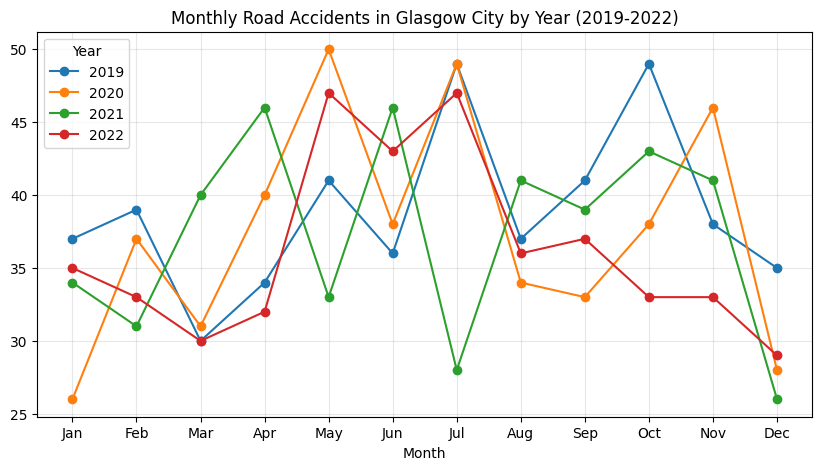

In [78]:
southend_df = uk[uk['District Area'] == 'Southend-on-Sea']

monthly_southend_df = southend_df.groupby(['Year', 'Month']).size()

monthly_southend_df = monthly_southend_df.unstack(level=0)

monthly_southend_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

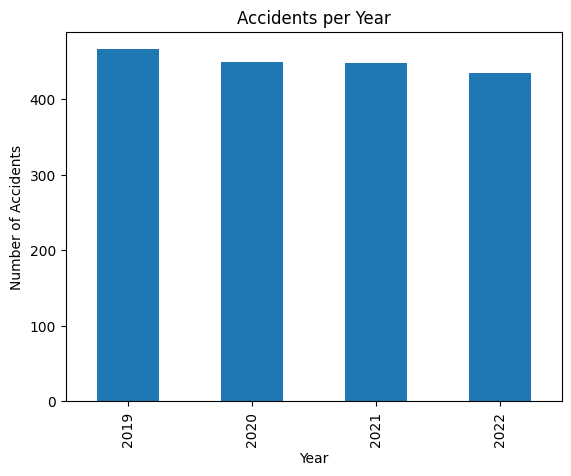

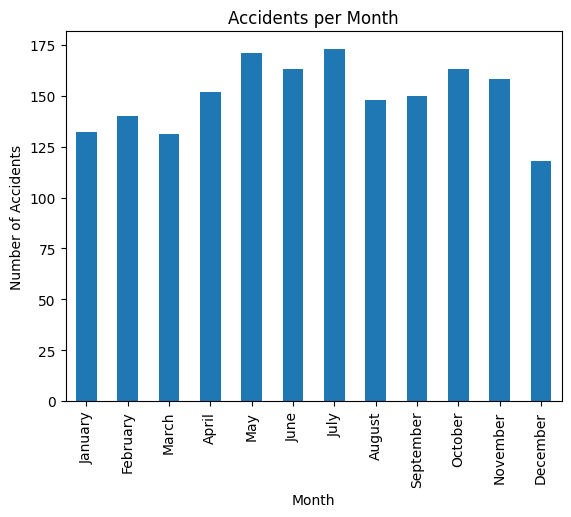

DayOfWeek
Monday       186
Tuesday      263
Wednesday    272
Thursday     240
Friday       287
Saturday     298
Sunday       253
Name: count, dtype: int64


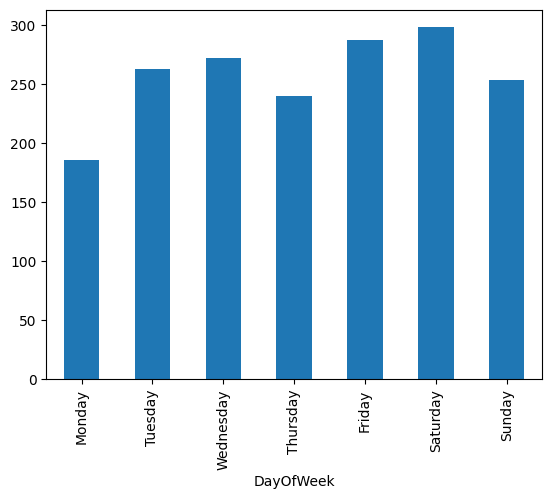

In [82]:
accidents_per_year = southend_df['Year'].value_counts().sort_index()
accidents_per_month = southend_df['Month'].value_counts().sort_index()
accidents_per_day = southend_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Southend-on-Sea</h1>

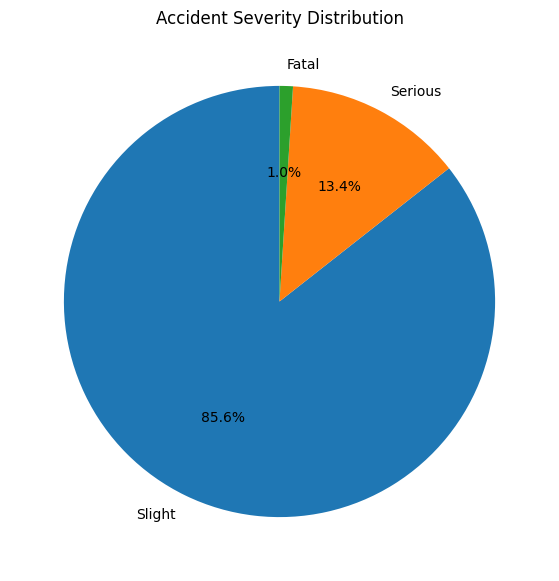

NameError: name 'glasgow_df' is not defined

In [83]:
severity_southend_df  = southend_df['Accident_Severity'].value_counts()

plt.pie(severity_southend_df,
        labels = severity_southend_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_glasgow_df = glasgow_df[glasgow_df['Year'] == 2019]
# severity_2021
lsc_2021 = severity_2021_glasgow_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution during 2019')
plt.show()

<h1>Insight 28</h1>
<p>In Southend-On-Sea, data from monthly road accidents between 2019 and 2022 shows a consistent decline in incidents during December each year. This is unexpected, given the busy Christmas season and increased road traffic. However, it’s possible that slower-moving vehicles due to traffic congestion help reduce the likelihood of accidents.
Annual accident figures remain relatively steady, with each year recording over 400 incidents. December consistently has the lowest accident count, which may reflect more cautious driving as people aim to reach their families safely during the holidays.
Saturday stands out as the day with the highest number of accidents, likely due to increased weekend travel.
Most accidents were classified as slight in severity, accounting for 85.6% in 2022 and 85.9% in 2019.
</p>

In [88]:
hounslow_df = uk[uk['District Area'] == 'Hounslow']

<h1>Hounslow</h1>

<h1>14.) During which periods(per month) do accidents usually happen in Hounslow?</h1>

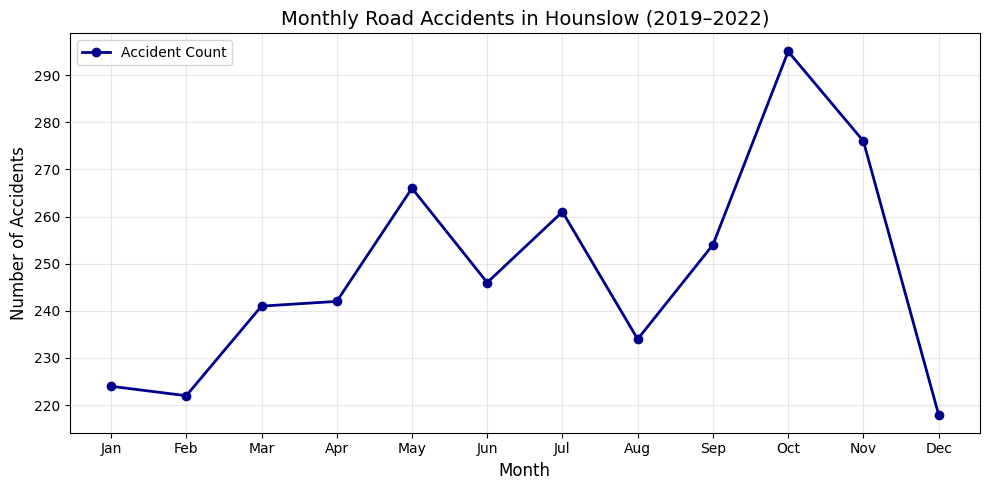

In [87]:
hounslow_df['Accident Date'] = pd.to_datetime(hounslow_df['Accident Date'])

monthly = hounslow_df.groupby(hounslow_df['Accident Date'].dt.month).size().reindex(range(1,13), fill_value=0)


plt.figure(figsize=(10, 5))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=2, color='darkblue')
plt.title("Monthly Road Accidents in Hounslow (2019–2022)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend(['Accident Count'], loc='upper left')
plt.tight_layout()
plt.show()

<h1> insight 29 </h1>
<hr>
<p>October recorded the highest number of road accidents in Hounslow, with approximately 295 cases, making it the most accident-heavy month. A noticeable increase occurred between March and May, reaching a peak in May with 266 reported accidents.</p>

<h1>Insight 30</h1>
<hr>
<p>On the other hand in the month of december has the lowest record of road accidents in hounslow, that only recorded 215 cases</p>

<h1>Insight 31</h1>
<hr>
<p>Lastly threse is a noticeable increase occurred between March and May, reaching a peak in May with 266 reported accidents.</p>